In [3]:
import pandas as pd
import numpy as np
from feature_selector import FeatureSelector
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_selection import VarianceThreshold
from sklearn.ensemble import RandomForestRegressor
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
import time
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

1. The comparison of Wrapper methods involves extracting one year data of three building from each category.
2. The best number of features are recorded for each building such that we can inform the prediction process with suitale feature numbers
3. Only one regressor is experimented
4. Only RMSE is used to judge the accuracy

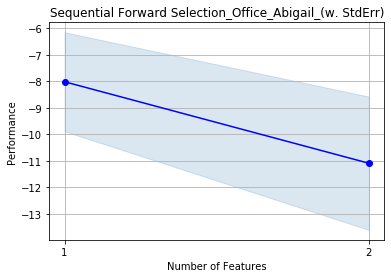

Best_score_Office_Abigail_-8.018432974222886
Best_score_rmse_Office_Abigail_2.831683770166239
Best_features_index_(0,)
Time for selecting optimal features:00:00:05


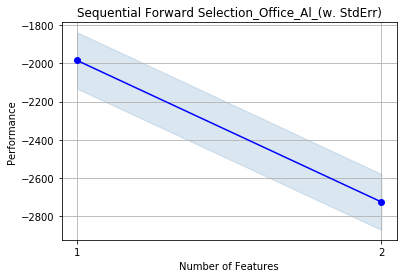

Best_score_Office_Al_-1985.263688048064
Best_score_rmse_Office_Al_44.556297961658174
Best_features_index_(0,)
Time for selecting optimal features:00:00:04


In [31]:
rf_r = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)
chosen_building_names = ['Office_Abigail','Office_Al','Office_Alannah',
                         'PrimClass_Jamie','PrimClass_Jane','PrimClass_Janelle',
                         'UnivClass_Craig','UnivClass_Jadon','UnivClass_Maddison',
                         'UnivDorm_Leann','UnivDorm_Leonard','UnivDorm_Leslie',
                         'UnivLab_Lester','UnivLab_Levi','UnivLab_Lilly']
for i in chosen_building_names:
    features = pd.read_csv('/Users/t.wang/Desktop/Dissertation/Python/WT-result/One_year_data/'+ i + '_One_year_features.csv')
    target = pd.read_csv('/Users/t.wang/Desktop/Dissertation/Python/WT-result/One_year_data/'+ i + '_One_year_target.csv')
    
    start = time.time()
    sfs = SFS(rf_r, 
              k_features="parsimonious", 
              forward=True, 
              floating=False, 
              scoring='neg_mean_squared_error',
              cv=4,
              n_jobs=-1)
    sfs = sfs.fit(features, target)
    
    # Plotting the results
    fig = plot_sfs(sfs.get_metric_dict(), kind='std_err')
    plt.title('Sequential Forward Selection_' + i + '_(w. StdErr)')
    plt.grid()
    plt.show()
    print('Best_score_'+ i + '_' +str(sfs.k_score_))
    print('Best_score_rmse_' + i + '_'  + str(np.sqrt(-sfs.k_score_)))
    print('Best_features_index_' + str(sfs.k_feature_idx_))
    end = time.time()
    elapsed = end - start 
    print('Time for selecting optimal features:'+ time.strftime("%H:%M:%S", time.gmtime(elapsed)))

